# Cleaning data and exporting to csv

In [1]:
import pandas as pd

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


## Fill missing values

In [4]:
df_clean = df.copy()

# lägger till mean eller median för varje numerisk kolumn beroende på om det finns mycket outliers eller inte
col_funcs = {"Trip_Distance_km": "median", "Passenger_Count": "median", "Base_Fare": "mean","Per_Km_Rate": "median", "Per_Minute_Rate": "mean", "Trip_Duration_Minutes": "median"}

# loopar igenom och ändrar nullvärden till mean eller median
for col, func in col_funcs.items():
    if func == "median":
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    if func == "mean":
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# hämtar ut resterande kolumner som inte är numeriska
object_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]

# loopar igenom dessa och hämtar ut det mest återkommande värdet för varje kolumn, och fyller i detta värde vid nullvärden
for col in object_cols:
    mode_value = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_value)

(df_clean.describe().T - df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,50.0,-0.062027,-0.502639,0.0,0.4750,0.000000,-0.6225,0.0
Passenger_Count,50.0,-0.023842,-0.022918,0.0,0.7500,0.000000,0.0000,0.0
Base_Fare,50.0,0.000000,-0.022055,0.0,0.0400,-0.017011,-0.0575,0.0
Per_Km_Rate,50.0,-0.000666,-0.010884,0.0,0.0100,0.000000,-0.0300,0.0
Per_Minute_Rate,50.0,0.000000,-0.002930,0.0,0.0075,0.002916,-0.0075,0.0
Trip_Duration_Minutes,50.0,-0.012906,-0.814943,0.0,1.2250,0.000000,-1.2800,0.0
Trip_Price,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.0000,0.0


## Split dataset into df without missing values and df with missing values for target-column

In [5]:
# spara alla rader där Trip_Price har ett värde, fortsätt rengöra denna
df_clean = df_clean[df_clean["Trip_Price"].notna()]

# spara för senare prediction vid user input efter modellen är färdig
df_no_price = df_clean[df_clean["Trip_Price"].isna()]

# tog bort 49 rader
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    object 
 2   Day_of_Week            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    object 
 5   Weather                951 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


## Check and compare the dataframes to see if everything looks good

In [6]:
len(df_clean), len(df_no_price)

(951, 0)

In [7]:
df_no_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       0 non-null      float64
 1   Time_of_Day            0 non-null      object 
 2   Day_of_Week            0 non-null      object 
 3   Passenger_Count        0 non-null      float64
 4   Traffic_Conditions     0 non-null      object 
 5   Weather                0 non-null      object 
 6   Base_Fare              0 non-null      float64
 7   Per_Km_Rate            0 non-null      float64
 8   Per_Minute_Rate        0 non-null      float64
 9   Trip_Duration_Minutes  0 non-null      float64
 10  Trip_Price             0 non-null      float64
dtypes: float64(7), object(4)
memory usage: 0.0+ bytes


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    object 
 2   Day_of_Week            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    object 
 5   Weather                951 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


## Check outliers

<Axes: >

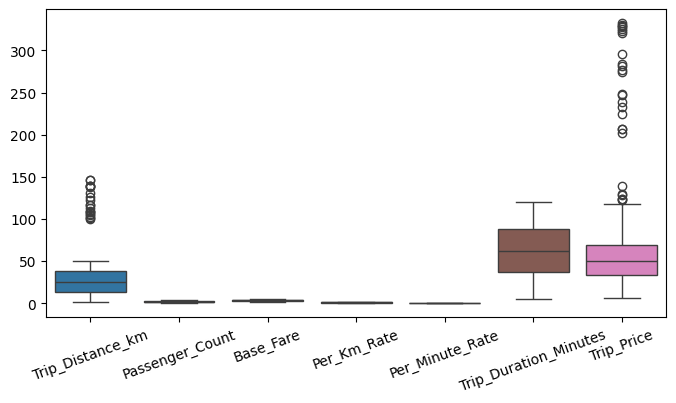

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,4), dpi=100)
plt.xticks(rotation=20)
sns.boxplot(df_clean)

## Remove outliers

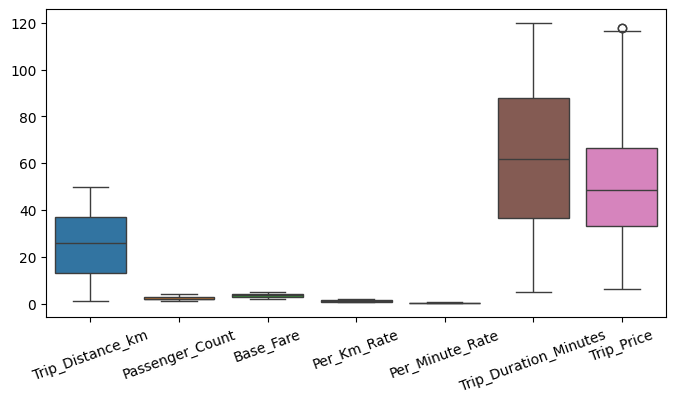

In [10]:
for col in ["Trip_Price", "Trip_Distance_km"]:

    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
        
    df_clean = df_clean[
        (df_clean[col] >= lower_bound) &
        (df_clean[col] <= upper_bound)
    ]
    
plt.subplots(1, figsize=(8,4), dpi=100)
plt.xticks(rotation=20)
sns.boxplot(df_clean);

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       925 non-null    float64
 1   Time_of_Day            925 non-null    object 
 2   Day_of_Week            925 non-null    object 
 3   Passenger_Count        925 non-null    float64
 4   Traffic_Conditions     925 non-null    object 
 5   Weather                925 non-null    object 
 6   Base_Fare              925 non-null    float64
 7   Per_Km_Rate            925 non-null    float64
 8   Per_Minute_Rate        925 non-null    float64
 9   Trip_Duration_Minutes  925 non-null    float64
 10  Trip_Price             925 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.7+ KB


In [12]:
df = df_clean.drop(columns=["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       925 non-null    float64
 1   Passenger_Count        925 non-null    float64
 2   Base_Fare              925 non-null    float64
 3   Per_Km_Rate            925 non-null    float64
 4   Per_Minute_Rate        925 non-null    float64
 5   Trip_Duration_Minutes  925 non-null    float64
 6   Trip_Price             925 non-null    float64
dtypes: float64(7)
memory usage: 57.8 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,925.0,24.994422,13.948933,1.2300,12.860,25.830000,36.870,49.9900
Passenger_Count,925.0,2.462703,1.075083,1.0000,2.000,2.000000,3.000,4.0000
Base_Fare,925.0,3.494550,0.844576,2.0100,2.760,3.502989,4.170,5.0000
Per_Km_Rate,925.0,1.223470,0.417137,0.5000,0.870,1.220000,1.560,2.0000
Per_Minute_Rate,925.0,0.293767,0.112695,0.1000,0.200,0.292916,0.390,0.5000
Trip_Duration_Minutes,925.0,61.785038,31.609168,5.0100,36.560,61.860000,87.740,119.8400
Trip_Price,925.0,51.690386,23.376955,6.1269,33.344,48.449600,66.581,118.0321


In [24]:
df["Trip_Duration_Minutes"].value_counts()

Trip_Duration_Minutes
61.86     46
83.98      2
96.08      2
30.47      2
29.64      2
          ..
58.39      1
61.96      1
54.18      1
114.94     1
29.69      1
Name: count, Length: 851, dtype: int64

## Export cleaned and missing target dataframes to csv

In [15]:
df_clean.to_csv("../src/taxipred/data/taxi_trip_pricing_cleaned.csv")

df_no_price.to_csv("../src/taxipred/data/missing_target_data.csv")

df.to_csv("../src/taxipred/data/taxi_trip_pricing_cleaned_no_categorical.csv")